In [1]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 448 kB 50.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
okt = Okt()
import matplotlib.font_manager as fm
import re
from PIL import Image
from io import BytesIO 
import datetime
from collections import Counter

In [3]:
labels = ['place','date','messenger','category','type','due','summary','name','phone','email','detail','receive','address','end','period','address_detail','result','result_detail','sign','etc']
data_jcp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sounds/sounds_place_jcparking.csv', names = labels, encoding='cp949')
data_jcp.head()

,place,date,messenger,category,type,due,summary,name,phone,email,detail,receive,address,end,period,address_detail,result,result_detail,sign,etc
NaN,place,date,messenger,category,type,due,summary,name,phone,email,detail,receive,address,end,period,address_detail,result,result_detail,sign,etc
473.0,조치원역주차장,2020-12-03,시민의소리,고객서비스,질의,14,조치원역 공영주차장,김현주,010-3975-3731,--,조치원역 공영주차장 월정기권 신청 절차 좀 알려주셔요,황세희,구도심주차장,2020-12-04,1,안녕하세요. 세종시설공단 체육주차팀 공영주차장입니다. \r\n 우리 공단에서 운영 ...,조치완료(진행),--,O,--
272.0,조치원역주차장,2019-08-19,시민의소리,고객서비스,진정,7,공영주차장 문제시 누구에게 문의하여야하는건가요?,염병란,010-4523-0423,--,조치원 공영주차장 이용시 불편사항입니다. \r\n금일 조치원 공영주차장에 입차하고 ...,황세희,황세희,2019-08-21,2,안녕하십니까 세종시설공단 체육주차팀 조치원역공영주차장 입니다. \r\n\r\n우리 ...,조치완료(진행),--,O,유선 안내 및 환불조치 완료
195.0,조치원역주차장,2018-12-20,시민의소리,운영체계,건의,14,조치원역 근처 주차장 주차비용 조정요청,김형근,010-8814-4818,--,조치원역 주차장 주차비용 조정요청\r\n\r\n가끔씩 조치원역을 이용하고 있습니다....,유연희,금무성,2018-12-21,1,안녕하세요. 세종시설공단 복지사업팀입니다. \r\n먼저 우리 공단과 우리 공단이 운...,조치완료(진행),--,O,--
22.0,조치원역주차장,2018-02-19,시민의소리,운영체계,건의,14,조치원역 공영주차장 월정액 가능하게 해주세요,안미현,010-3001-6902,--,저는 조치원역 부근에 직장이 있어 조치원을 자주 방문하고 있습니다 \r\n그런데 조...,유연희,금무성,2018-02-21,2,안녕하세요 세종시설공단 복지사업팀입니다. 우리 공단과 우리 공단이 운영하고 있는 주...,조치완료(진행),--,O,--


In [4]:
circle_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/circle_img.jpg'))

In [12]:
jcp_detail = data_jcp['detail']
jcp_d_tolist = jcp_detail.values.tolist()
jcp_d_list = ''
for i in jcp_d_tolist:
  jcp_d_list += i
jcp_d_nouns = okt.nouns(jcp_d_list)
jcp_d_n = ''
for i in jcp_d_nouns:
  jcp_d_n += i+' '
jcp_d_nouns_count = Counter(jcp_d_nouns)
stopwords = set(STOPWORDS)
stopwords.update(['주차장','조치원역','조치원'])

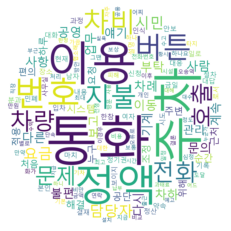

In [13]:
wd_jcp_d = WordCloud(max_font_size=250,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(jcp_d_n)
fig = plt.figure()
plt.imshow(wd_jcp_d, interpolation='bilinear')
plt.axis('off')
wd_jcp_d.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_jcp_d.jpg')

In [5]:
jcp_question = data_jcp[data_jcp['type'] == "질의"]
jcp_question_detail = jcp_question['detail']

jcp_check = data_jcp[data_jcp['type'] == "확인"]
jcp_check_detail = jcp_check['detail']

jcp_request = data_jcp[data_jcp['type'] == "건의"]
jcp_request_detail = jcp_request['detail']

질의

In [ ]:
jcp_qd_tolist = jcp_question_detail.values.tolist()
jcp_qd_list = ''
for i in jcp_qd_tolist:
  jcp_qd_list += i

In [ ]:
jcp_qd_nouns = okt.nouns(jcp_qd_list)
jcp_qd_n = ''
for i in jcp_qd_nouns:
  jcp_qd_n += i+' '

In [ ]:
jcp_qd_nouns_count = Counter(jcp_qd_nouns)
jcp_qd_nouns_count

Counter({'공영': 1,
         '신청': 1,
         '월': 1,
         '절차': 1,
         '정기권': 1,
         '조치원역': 1,
         '좀': 1,
         '주차장': 1})

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['은하수','공원','세종'])

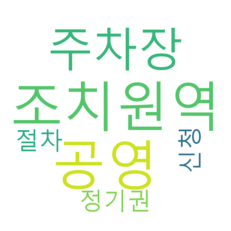

In [ ]:
wd_jcp_qd = WordCloud(max_font_size=250,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(jcp_qd_n)
fig = plt.figure()
plt.imshow(wd_jcp_qd, interpolation='bilinear')
plt.axis('off')
wd_jcp_qd.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_jcp_qd.jpg')

확인(=0)

In [ ]:
jcp_cd_tolist = jcp_check_detail.values.tolist()
jcp_cd_list = ''
for i in jcp_cd_tolist:
  jcp_cd_list += i

In [ ]:
jcp_cd_nouns = okt.nouns(jcp_cd_list)
jcp_cd_n = ''
for i in jcp_cd_nouns:
  jcp_cd_n += i+' '

In [ ]:
jcp_cd_nouns_count = Counter(jcp_cd_nouns)
jcp_cd_nouns_count

Counter()

In [ ]:
stopwords = set(STOPWORDS)
# stopwords.update(['모집', '임대', '아파트', '행복'])

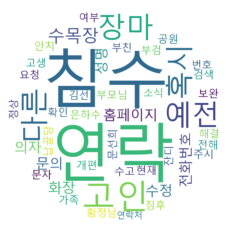

In [ ]:
wd_jcp_cd = WordCloud(max_font_size=300,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(jcp_cd_n)
fig = plt.figure()
plt.imshow(wd_jcp_cd, interpolation='bilinear')
plt.axis('off')
wd_jcp_cd.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_jcp_cd.jpg')

건의

In [6]:
jcp_rd_tolist = jcp_request_detail.values.tolist()
jcp_rd_list = ''
for i in jcp_rd_tolist:
  jcp_rd_list += i

In [7]:
jcp_rd_nouns = okt.nouns(jcp_rd_list)
jcp_rd_n = ''
for i in jcp_rd_nouns:
  jcp_rd_n += i+' '

In [8]:
jcp_rd_nouns_count = Counter(jcp_rd_nouns)
jcp_rd_nouns_count

Counter({'가끔': 1,
         '객': 1,
         '것': 4,
         '공단': 1,
         '공용': 1,
         '과': 1,
         '과태료': 1,
         '근처': 2,
         '금액': 1,
         '기본': 1,
         '기차': 1,
         '납부': 1,
         '누군가': 1,
         '단속': 1,
         '대수': 1,
         '대해': 1,
         '도달': 1,
         '돈': 1,
         '때': 1,
         '만원': 1,
         '방문': 1,
         '별로': 1,
         '보통': 1,
         '부근': 1,
         '비': 1,
         '비교': 1,
         '비용': 1,
         '사용': 1,
         '설치': 1,
         '수고': 1,
         '수익': 1,
         '순간': 1,
         '시간': 1,
         '시민': 3,
         '시설': 1,
         '실욕': 1,
         '알': 2,
         '어드': 1,
         '예고': 1,
         '오송역': 1,
         '요금': 3,
         '요청': 1,
         '월': 5,
         '위해': 2,
         '이경우': 1,
         '이용': 5,
         '자주': 1,
         '저': 2,
         '적용': 2,
         '전쟁': 1,
         '절': 1,
         '정도': 1,
         '정액': 5,
         '조정': 2,
         '조치원': 1,
         '조치원역'

In [14]:
stopwords = set(STOPWORDS)
stopwords.update(['주차장','조치원','조치원역'])

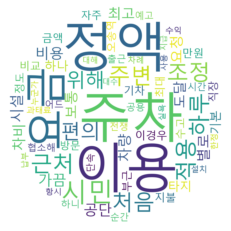

In [15]:
wd_jcp_rd = WordCloud(max_font_size=250,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(jcp_rd_n)
fig = plt.figure()
plt.imshow(wd_jcp_rd, interpolation='bilinear')
plt.axis('off')
wd_jcp_rd.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_jcp_rd.jpg')